In [1]:
#project :p8
#submitter : lqin33
#partner : mjiao5

In [2]:
import csv
import copy
import math
import matplotlib
import pandas
%matplotlib inline

def get_mapping(path):
    file = open(path, encoding = 'utf-8')
    file_reader = csv.reader(file)
    data = list(file_reader)
    file.close()
    dict_1 = {}
    for i in range(len(data)):
        dict_1[data[i][0]] = data[i][1]
    return dict_1




In [3]:
#q1
id_to_names = get_mapping('small_mapping.csv')
get_mapping('small_mapping.csv')

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [4]:
#q2
id_to_names['nm0001219']

'Gary Fleder'

In [5]:
#q3
def find_values(name = 'nm', nums = 2):
    blank = []
    for i in id_to_names:
        if i[0:nums] == name:
            blank.append(id_to_names[i])
    return blank
            
find_values(name = 'nm', nums = 2)      

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [6]:
def find_lastname(start = "G"):
    blank = []
    for i in id_to_names:
        for j in range(len(id_to_names[i])):
            if id_to_names[i][j] == ' ' and id_to_names[i][j+1] == "G":
                blank.append(i)
    return blank

In [7]:
#q4 
find_lastname(start = "G")

['nm0000154', 'nm0000418']

In [8]:
def get_raw_movies(path = 'small_movies.csv'):
    file = open(path, encoding = 'utf-8')
    file_reader = csv.reader(file)
    data = list(file_reader)
    file.close()
    str_1 = ','
    header = data[0] #header
    content = data[1:] #player_data
    blank = []
    for i in range(len(content)):
        dict_1 = {}
        for j in range(len(header)):
            title = data[0][j]
            value = content[i][j]
            dict_1[title] = value      
        blank.append(dict_1)
    for row in blank:
        for i in ['directors','actors','genres']:
            row[i] = list(row[i].split(','))
        for j in ['year']:
            row[j] = int(row[j])
        for k in ['rating']:
            row[k] = float(row[k])
    return blank

In [9]:
#q5
raw_movies = get_raw_movies(path = 'small_movies.csv')
raw_movies

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [10]:
#q6
def findNumbers(index = 1, header = 'actors'):
    list_1 = raw_movies[index][header]
    return list_1

len(findNumbers(index = 1, header = 'actors'))

4

In [11]:
#q7
findNumbers(index = 0, header = 'actors')[0]

'nm0000131'

In [12]:
def get_movies(movies_path = 'small_movies.csv', mapping_path = 'small_mapping.csv'):
    id_to_names = get_mapping(mapping_path)
    raw_movies = get_raw_movies(movies_path)
    new_rawMovies = copy.deepcopy(raw_movies)
    for row in new_rawMovies:
        row['title'] = id_to_names[row['title']]
        for i in ['directors','actors']:
            id_list = row[i]
            for j in range(len(id_list)):
                id_list[j] = id_to_names[id_list[j]]
            row[i] = id_list
    return new_rawMovies

small = get_movies("small_movies.csv", "small_mapping.csv")

In [13]:
id_to_names

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [14]:
#q8
small[1]["title"]

'Lethal Weapon'

In [15]:
#q9
small[0]["actors"]

['John Cusack', 'Gene Hackman', 'Dustin Hoffman']

In [16]:
#q10
small[-1]["directors"]

['Richard Donner']

In [17]:
movies = get_movies('movies.csv', 'mapping.csv')

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [19]:
#q11
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [20]:
#q12
movies[0:2]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']}]

In [21]:
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

In [22]:
#q13
filter_movies_by_year(movies = copy.copy(movies), year = 1929)

[{'title': 'Redskin',
  'year': 1929,
  'rating': 7.0,
  'directors': ['Victor Schertzinger'],
  'actors': ['Richard Dix', 'Tully Marshall', 'George Regas'],
  'genres': ['Adventure', 'Drama', 'Western']},
 {'title': 'The Girl in the Show',
  'year': 1929,
  'rating': 6.5,
  'directors': ['Edgar Selwyn'],
  'actors': ['Raymond Hackett', 'Edward J. Nugent'],
  'genres': ['Comedy']},
 {'title': 'Atlantic',
  'year': 1929,
  'rating': 5.5,
  'directors': ['Ewald André Dupont'],
  'actors': ['Franklin Dyall', 'John Stuart'],
  'genres': ['Drama']}]

In [23]:
#q14
filter_movies_by_year(movies = copy.copy(movies), year = 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [24]:
def findUnique(name):
    blank = []
    for i in range(len(movies)):
        a = movies[i].get(name)
        for j in a:
            blank.append(j)
    return list(set(blank))

#q15
len(findUnique('actors'))

2605

In [25]:
#q16
len(findUnique('genres'))


18

In [26]:
#q17
def convertDict(header):
    blank = []
    for i in movies:
        blank.append(i[header])
    return blank


sorted(convertDict('title'))[-1]

'Zorba the Greek'

In [27]:
#q18
sum(convertDict('rating'))/len(convertDict('rating'))

6.401659528907912

In [28]:
def findValue(Max, header1,header2):
    for row in movies:
        if Max == True and row[header1] == sorted(convertDict(header1))[-1]:
            return row[header2]
        elif Max == False and row[header1] == sorted(convertDict(header1))[0]:
            return row[header2]
    

In [29]:
#q19
findValue(True, 'rating','title')

'The Godfather'

In [30]:
#q20
findValue(False, 'year', 'title')

'Shoulder Arms'

In [31]:
findUnique('genres')

['Crime',
 'Action',
 'Animation',
 'Sci-Fi',
 'Thriller',
 'Adventure',
 'War',
 'Horror',
 'Family',
 'Sport',
 'Mystery',
 'Drama',
 'History',
 'Western',
 'Fantasy',
 'Comedy',
 'Romance',
 'Music']

In [32]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

for row in test_movies:
    print(row)

{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']}
{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}
{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}
{'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}


In [33]:
def find_header(test_movies, year = 'year'):
    blank = []
    for row in test_movies:
        blank.append(row[year])
    return list(set(blank))


# TODO: return dict of lists of movie dicts
def bucketize(movie_list,movie_key):
    key = []
    bucket = {}
    for i in movie_list:
        if not type(i[movie_key]) == list and not i[movie_key] in key:
            key.append(i[movie_key])
        elif type(i[movie_key]) == list:
            for j in i[movie_key]:
                if not j in key:
                    key.append(j)
                    
    for i in key:
        list1 = []
        for j in movie_list:
            if not type(j[movie_key]) == list:
                if j[movie_key] == i:
                    list1.append(j)
                    bucket[i] = list1
            else:
                for k in j[movie_key]:
                    if k == i:
                        list1.append(j)
                        bucket[i] = list1
                    
    return bucket

            

In [34]:
#q21
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [35]:
#q22
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [36]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [37]:
#q24
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [38]:
#q25

len(bucketize(small, "directors"))

2

In [39]:
#q26
len(bucketize(movies, "directors"))

1247

In [40]:
dict_2 = bucketize(movies, "genres")

In [41]:
#q27
def bucket_counts(movies, header):
    header_dict = {}
    bucket=bucketize(movies,header)
    for i in bucket:
        header_dict[i]=len(bucket[i])
        
    return header_dict

bucket_counts(movies,"genres")

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [42]:
def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

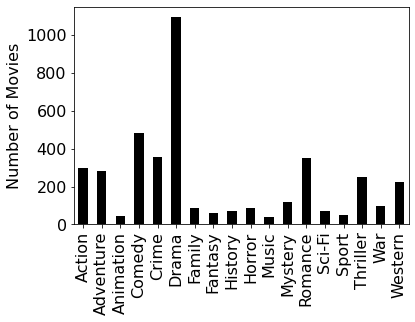

In [43]:
#q28
genres = bucket_counts(movies,"genres")
plot_dict(genres, "Number of Movies")

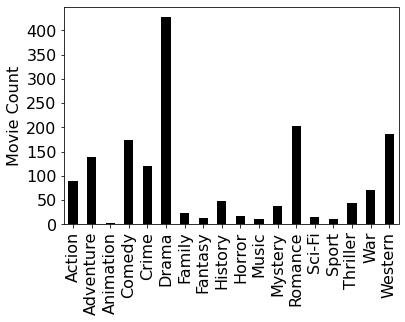

In [44]:
#q29
def filter_year(movies, year, Past = "Past"):
    bucket = []
    for obj in movies:
        if not Past == "After" and not Past == "Past":
            print("Input is Wrong")
            break
        elif Past == "Past" and obj["year"]<year:
            bucket.append(obj)
        elif Past == "After" and obj["year"]>=year:
            bucket.append(obj)
        #the year equal to input is inculded in the "AFTER"
    return bucket

plot_dict(bucket_counts(filter_year(movies, 1970, "Past"), "genres"), "Movie Count")

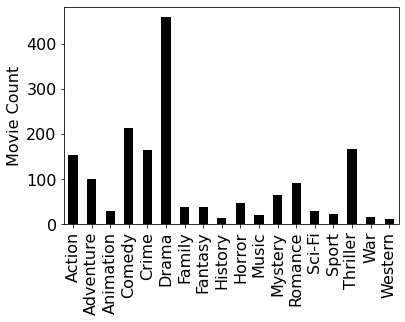

In [45]:
#q30
plot_dict(bucket_counts(filter_year(movies, 1990, "After"), "genres"), "Movie Count")

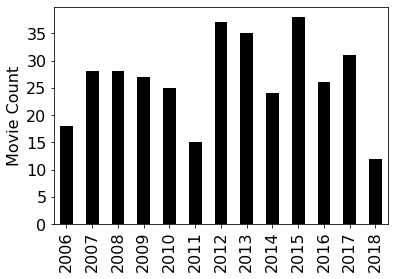

In [46]:
#q31
plot_dict(bucket_counts(filter_year(movies, 2006, "After"),"year"),"Movie Count")

In [47]:
def findyearspan(movie_list, movie_key):
    key = []
    year = {}
    for i in movie_list:
        for j in i[movie_key]:
            if not j in key:
                key.append(j)
    for i in key:
        year1 = None
        year2 = 3
        for j in movie_list:
            for k in j[movie_key]:
                if k == i:
                    if year1 is None or j['year'] < year1:
                        year1 = j['year']
                    if year2 is None or j['year'] > year2:
                        year2 = j['year']
                    year[i] = year2 - year1
    return year


In [48]:
career = findyearspan(movies, 'actors')
career
filtered = {}
for i in career:
    if career[i] >= 45:
        filtered[i] = career[i]
filtered

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Marlon Brando': 49,
 'Tony Curtis': 45,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Dean Stockwell': 53}

In [49]:
def filteryear(movie_list, movie_key, length, Past = "Past"):
    filtered = {}
    career = findyearspan(movie_list, movie_key)
    for i in career:
        if not Past == "After" and not Past == "Past":
            print("Input is Wrong")
            break
        elif Past == "After" and career[i] >= length:
            filtered[i] = career[i]
        elif Past == "Past" and career[i] <= length:
            filtered[i] = career[i]
            
    return filtered
    


In [50]:
#q32
filteryear(movies, 'actors', 45, "After")

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Marlon Brando': 49,
 'Tony Curtis': 45,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Dean Stockwell': 53}

In [51]:
#q33
filteryear(movies, 'directors', 25, "After")

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'J. Lee Thompson': 28,
 'Henry Hathaway': 36,
 'John Ford': 25,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'John Sturges': 25,
 'Richard Fleischer': 32,
 'Don Siegel': 27,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Burt Kennedy': 25,
 'William A. Graham': 25,
 'Richard Thorpe': 29,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [52]:
def row_ranking(row):
    return row["span"]

def top_n_span(buckets, n):
    # TODO: spans should be a dictionary mapping name to career span
    spans = buckets
    rows = []
    for name in spans:
        span = buckets[name]
        rows.append({"name": name, "span": span})

    # we want to sort the rows so that those with the biggest spans
    # are first.  Notice that we aren't calling row_ranking, but rather
    # passing a reference to this function to the sort method.  The sort
    # method uses this function to determine how to rank the rows.
    # 
    # we do a reverse sort because we want the biggest spans first,
    # not last
    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]
    # TODO: return a slice of the rows

In [53]:
#q34
top_n_span(findyearspan(movies, 'actors'), 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [54]:
#q35
top_n_span(findyearspan(movies, 'directors'), 21)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31},
 {'name': 'Cecil B. DeMille', 'span': 30},
 {'name': 'Lee H. Katzin', 'span': 30},
 {'name': 'John Huston', 'span': 30},
 {'name': 'Robert Siodmak', 'span': 30},
 {'name': 'Richard Thorpe', 'span': 29},
 {'name': 'J. Lee Thompson', 'span': 28},
 {'name': 'Don Siegel', 'span': 27},
 {'name': 'John Ford', 'span': 25},
 {'name': 'John Sturges', 'span': 25},
 {'name': 'Burt Kennedy', 'span': 25},
 {'name': 'William A. Graham', 'span': 25}]

In [55]:
def median(nums):
    b = copy.copy(nums) 
    b.sort()
    if len(b) % 2 == 1:
        return b[len(b) // 2]
    else:
        v1 = b[len(b) // 2]
        v2 = b[len(b) // 2 - 1]
        return (v1+v2) / 2
            
def median_rating(movie_list, movie_key):
    keys = []
    rows = []
    for i in movie_list:
        for j in i[movie_key]:
            if not j in keys:
                keys.append(j)
    for i in keys:
        ratings = []
        for j in movie_list:
            for k in j[movie_key]:
                if k == i:
                    ratings.append(j['rating'])
        rows.append({'name' : i, 'rating': median(ratings), 'count' : len(ratings)})
    return rows

In [56]:
def row_ranking(row):
    return row['rating']

def top_n_rating2(movie_list, movie_key, n):
    ratings = median_rating(movie_list, movie_key)
    ratings.sort(key = row_ranking, reverse = True)
    return ratings[:n]



In [57]:
#q36
top_n_rating2(movies, 'actors', 9)

[{'name': 'Heath Ledger', 'rating': 9.0, 'count': 1},
 {'name': 'John Fiedler', 'rating': 8.9, 'count': 1},
 {'name': 'Aldo Giuffrè', 'rating': 8.9, 'count': 1},
 {'name': 'Steven Williams', 'rating': 8.8, 'count': 1},
 {'name': 'Daniel Roebuck', 'rating': 8.8, 'count': 1},
 {'name': 'Joseph Gordon-Levitt', 'rating': 8.8, 'count': 1},
 {'name': 'Miyu Irino', 'rating': 8.6, 'count': 1},
 {'name': 'Andrew Kevin Walker', 'rating': 8.6, 'count': 1},
 {'name': 'Ken Watanabe', 'rating': 8.55, 'count': 2}]

In [58]:
#q37
top_n_rating2(movies, 'directors', 12)

[{'name': 'James Marlowe', 'rating': 8.8, 'count': 1},
 {'name': 'Kirk Wise', 'rating': 8.6, 'count': 1},
 {'name': 'David Fincher', 'rating': 8.6, 'count': 1},
 {'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'name': 'Adrian Molina', 'rating': 8.4, 'count': 1},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Moustapha Akkad', 'rating': 8.2, 'count': 1},
 {'name': 'Andrew Grieve', 'rating': 8.2, 'count': 6},
 {'name': 'Danny Boyle', 'rating': 8.2, 'count': 1}]

In [59]:
#q38

def top_n_rating3(movie_list, movie_key, n, numbers):
    ratings = median_rating(movie_list, movie_key)
    filtered = []
    for i in ratings:
        if i['count'] >= numbers:
            filtered.append(i)
    filtered.sort(key = row_ranking, reverse = True)
    return filtered[:n]
        
    
top_n_rating3(movies, 'actors', 14, 5)

[{'name': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'name': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'name': 'Robert Lindsay', 'rating': 8.2, 'count': 6},
 {'name': 'Charles Chaplin', 'rating': 8.149999999999999, 'count': 10},
 {'name': 'Bradley Cooper', 'rating': 7.3, 'count': 5},
 {'name': 'Joe Pesci', 'rating': 7.2, 'count': 7},
 {'name': 'Robin Williams', 'rating': 7.2, 'count': 5},
 {'name': 'Kirk Douglas', 'rating': 7.15, 'count': 12},
 {'name': 'Ward Bond', 'rating': 7.1, 'count': 10},
 {'name': 'Gregory Peck', 'rating': 7.1, 'count': 5},
 {'name': 'Tom Hanks', 'rating': 7.1, 'count': 6},
 {'name': 'Al Pacino', 'rating': 7.050000000000001, 'count': 8},
 {'name': 'Ben Johnson', 'rating': 7.050000000000001, 'count': 6},
 {'name': 'Charles Coburn', 'rating': 7.0, 'count': 9}]

In [60]:
#q39

top_n_rating3(movies, 'actors', 16, 30)

[{'name': 'Henry Fonda', 'rating': 6.9, 'count': 77},
 {'name': 'Mickey Rooney', 'rating': 6.7, 'count': 82},
 {'name': 'Anthony Quinn', 'rating': 6.7, 'count': 79},
 {'name': 'Brian Donlevy', 'rating': 6.7, 'count': 47},
 {'name': 'Robert Mitchum', 'rating': 6.65, 'count': 74},
 {'name': 'Glenn Ford', 'rating': 6.6, 'count': 74},
 {'name': 'George Sanders', 'rating': 6.6, 'count': 74},
 {'name': 'Robert De Niro', 'rating': 6.55, 'count': 74},
 {'name': 'Randolph Scott', 'rating': 6.5, 'count': 76},
 {'name': 'Jeff Bridges', 'rating': 6.5, 'count': 59},
 {'name': 'Ned Beatty', 'rating': 6.45, 'count': 50},
 {'name': 'Kurt Russell', 'rating': 6.4, 'count': 46},
 {'name': 'John Wayne', 'rating': 6.4, 'count': 130},
 {'name': 'John Cusack', 'rating': 6.4, 'count': 52},
 {'name': 'Danny Glover', 'rating': 6.4, 'count': 51},
 {'name': 'Dennis Quaid', 'rating': 6.35, 'count': 60}]

In [61]:
#q40
top_n_rating3(movies, 'directors', 8, 8)

[{'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Charles Chaplin', 'rating': 8.1, 'count': 11},
 {'name': 'Hayao Miyazaki', 'rating': 8.1, 'count': 9},
 {'name': 'Martin Scorsese', 'rating': 8.0, 'count': 8},
 {'name': 'John Ford', 'rating': 7.3, 'count': 21},
 {'name': 'Fritz Lang', 'rating': 7.2, 'count': 9}]